# Ribbon charts
Generally, a time-series chart represents the aggregate value (mean, median, sum etc.,) of a variable on a given time unit (day, week, month etc). But what if you want to represent the variation in the data as well? Ribbon charts are useful here - in representing the distribution of data in a time-series. This distribution is presented as min-max or 5-95 percentile data on a given time stamp.

For this we need a disaggregated time-series data with variation at time unit level.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def create_ribbon_charts(df, variable_name, time_stamp_column, label_name, title,
                         percentile_lowerlimit=0.05, percentile_higherlimit=0.95): 
    '''
    :param df: Disaggregated time-series data with variation at time unit level. 
    :param variable_name: The variable of interest.
    :param time_stamp_column: Name of the timeseries column.
    :label_name: Label name of the variable of interest.
    :title: Title of the plot.
    
    :percentile_lowerlimit: Lower percentile range at a timestamp (default 5 percentile)
    :percentile_higherlimit: Higher percentile range at a timestamp (default 95 percentile)
    '''
    #Low and high percentile range at every timestamp
    pct_low = df.groupby([time_stamp_column])[[variable_name]].quantile(percentile_lowerlimit).reset_index()    
    pct_high = df.groupby([time_stamp_column])[[variable_name]].quantile(percentile_higherlimit).reset_index()
    mean = df.groupby([time_stamp_column])[[variable_name]].mean().reset_index()
    fig = plt.figure(figsize=(15,5)) 
    
    x = pct_low[time_stamp_column]
    y1 = pct_low[variable_name]
    y2 = pct_high[variable_name]
    y_m = mean[variable_name]
    
    plt.plot(x,y1,color='pink',label=label_name,alpha=0.5)
    plt.plot(x,y2,color='pink',alpha=0.5)
    plt.fill_between(x, y1, y2, color='pink', alpha=0.5)
    plt.plot(x,y_m,color='black',linestyle='dashed')
    
    plt.ylabel(label_name)
    plt.title(title)
    plt.tight_layout()
    plt.show(True)
    return None


In [3]:
# Time series data -- AQI Bulletins data of all Indian Cities
# Though the data is aggregated at city level (one city has one value per time stamp) - data is disaggregated at all-India Level. (Multiple cities data on a given time stamp)
time_series_df = pd.read_csv('data/AllIndiaBulletins_Master.csv')
time_series_df['date'] = pd.to_datetime(time_series_df['date'])
time_series_df.sample(5)


C:\Users\dskcy\AppData\Local\Temp\ipykernel_10556\2272232103.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  time_series_df = pd.read_csv('data/AllIndiaBulletins_Master.csv')


,date,City,No. Stations,Air Quality,Index Value,Prominent Pollutant
262030,2023-07-17,Chengalpattu,1,Satisfactory,55,CO
227017,2023-01-24,Meerut,3,Poor,234,"PM10, PM2.5"
9221,2016-11-19,Pune,1,Poor,299,PM2.5
5718,2016-06-20,Nashik,1,Satisfactory,91,PM10
282197,2023-10-18,Dewas,1,Satisfactory,99,PM2.5


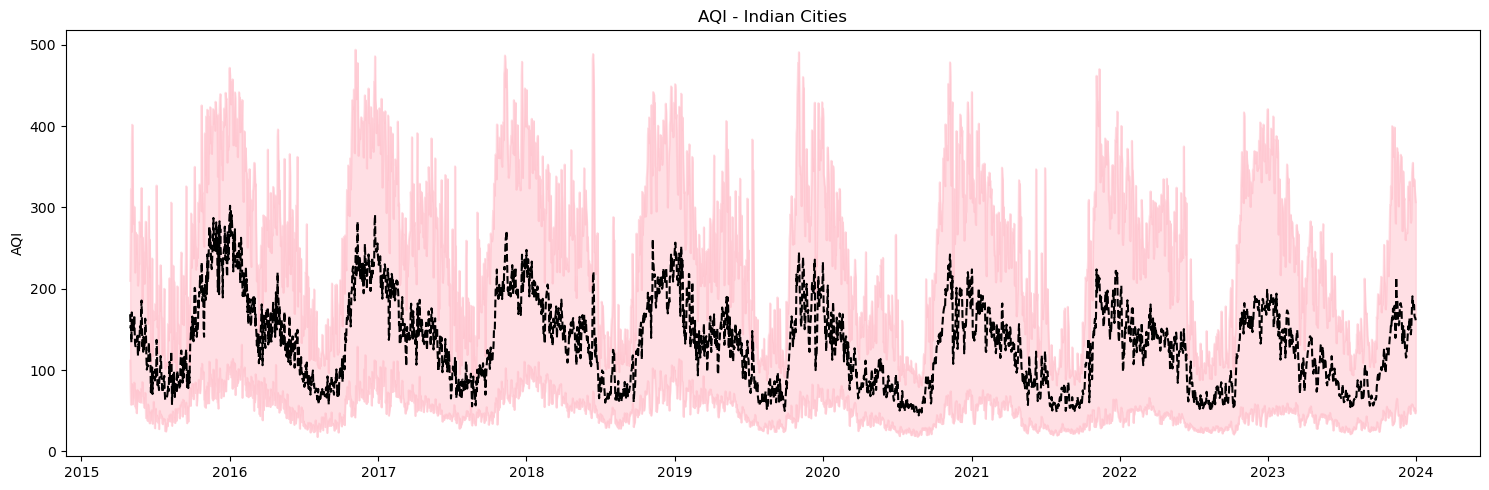

In [4]:
f = create_ribbon_charts(time_series_df,'Index Value','date',
                     'AQI','AQI - Indian Cities')

From a simple time-series (black dashed line), we would only know that AQI levels in Indian cities increase in winters. But from the ribbon plots, we also know the distribution of AQI levels in a time-series. We know that during winters, there is huge variation in AQI levels in Indian cities compared to monsoon months. Few cities are extremely polluted in winters, but few are doing as well as they are doing in summers. Exploration of this variation gives more insight about the state of air pollution in India.